Using device: cpu


100%|██████████| 9.91M/9.91M [00:00<00:00, 52.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.74MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.7MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.15MB/s]


Model parameters: 863,722
Starting training...
------------------------------------------------------------
Epoch 1/15
Batch 0/469, Loss: 2.3426, Acc: 10.94%
Batch 100/469, Loss: 0.4815, Acc: 56.44%
Batch 200/469, Loss: 0.1802, Acc: 72.80%
Batch 300/469, Loss: 0.2697, Acc: 79.43%
Batch 400/469, Loss: 0.1593, Acc: 83.12%
Train Loss: 0.4627, Train Acc: 84.84%
Test Loss: 0.0458, Test Acc: 98.52%
Learning Rate: 0.001000
------------------------------------------------------------
Epoch 2/15
Batch 0/469, Loss: 0.2020, Acc: 93.75%
Batch 100/469, Loss: 0.0777, Acc: 95.38%
Batch 200/469, Loss: 0.1763, Acc: 95.55%
Batch 300/469, Loss: 0.0930, Acc: 95.77%
Batch 400/469, Loss: 0.1059, Acc: 95.94%
Train Loss: 0.1388, Train Acc: 95.97%
Test Loss: 0.0298, Test Acc: 98.98%
Learning Rate: 0.001000
------------------------------------------------------------
Epoch 3/15
Batch 0/469, Loss: 0.1370, Acc: 95.31%
Batch 100/469, Loss: 0.0248, Acc: 96.44%
Batch 200/469, Loss: 0.0375, Acc: 96.71%
Batch 300/469,

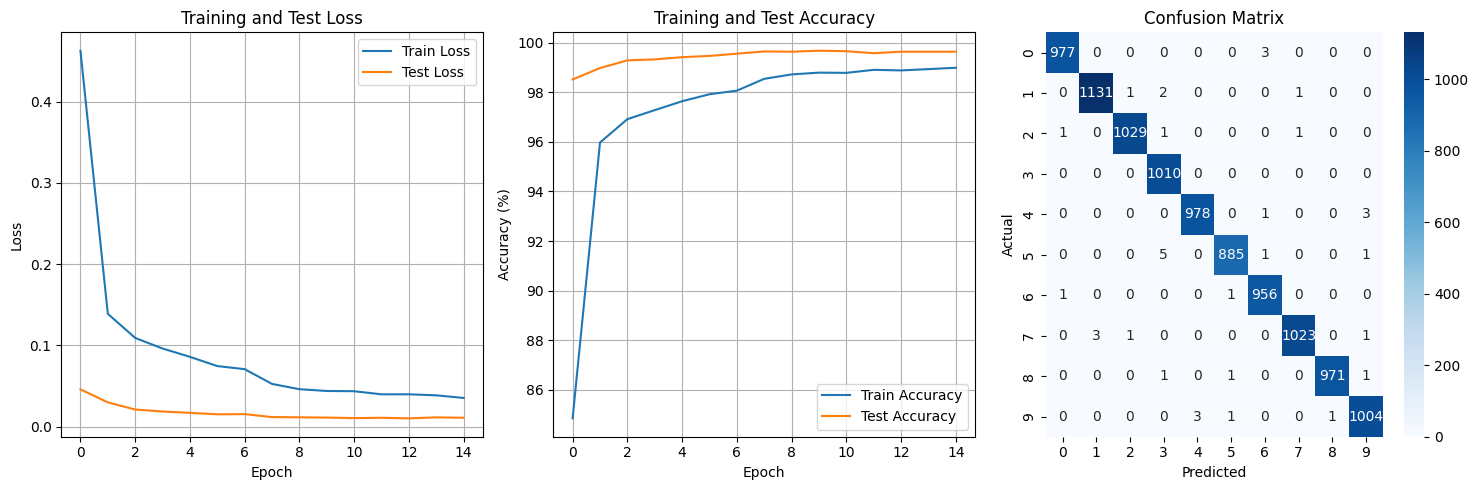


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      1.00      1010
           4       1.00      1.00      1.00       982
           5       1.00      0.99      0.99       892
           6       0.99      1.00      1.00       958
           7       1.00      1.00      1.00      1028
           8       1.00      1.00      1.00       974
           9       0.99      1.00      0.99      1009

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000


Visualizing Model Predictions:


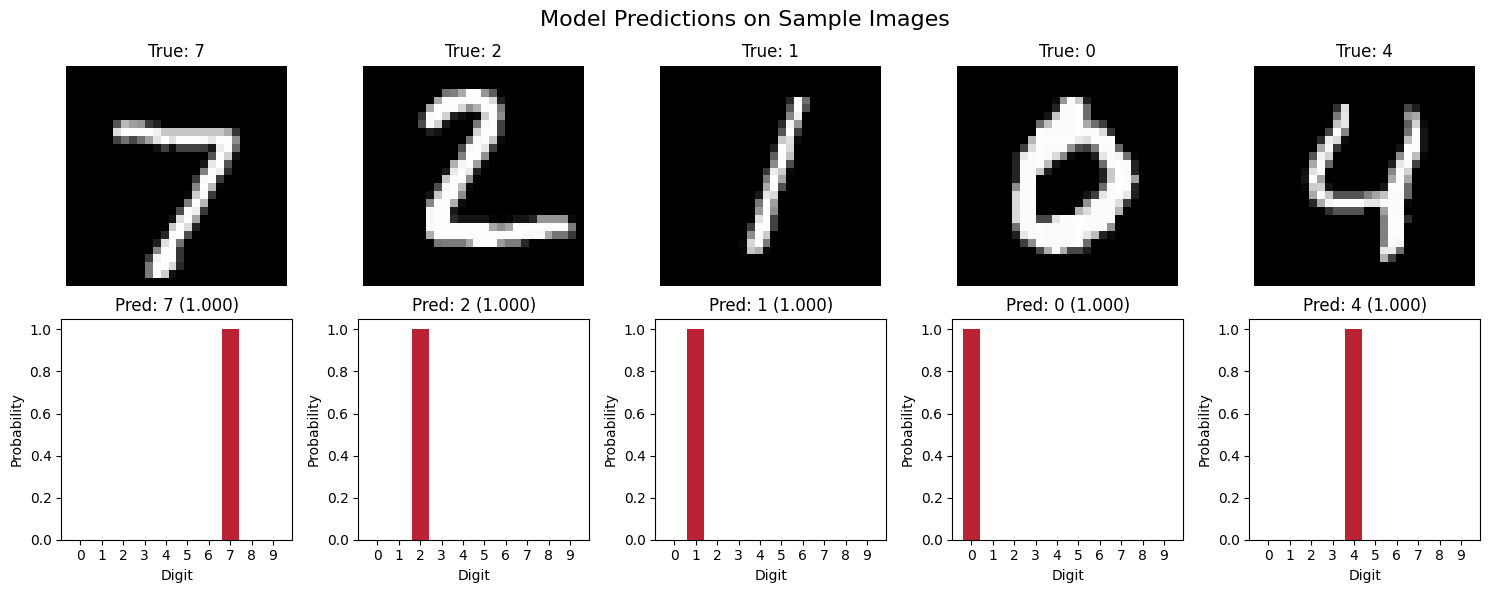


Detailed Predictions:
--------------------------------------------------
Sample 1: True=7, Pred=7, Confidence=1.000 ✓
Sample 2: True=2, Pred=2, Confidence=1.000 ✓
Sample 3: True=1, Pred=1, Confidence=1.000 ✓
Sample 4: True=0, Pred=0, Confidence=1.000 ✓
Sample 5: True=4, Pred=4, Confidence=1.000 ✓

Model saved! Final test accuracy: 99.64%
Model architecture summary:
MNISTNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_sta

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Define CNN Architecture
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        # First convolutional block
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout2d(0.25)

        # Second convolutional block
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.dropout2 = nn.Dropout2d(0.25)

        # Third convolutional block
        self.conv5 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(128)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.dropout3 = nn.Dropout2d(0.25)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 3 * 3, 512)
        self.dropout4 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.dropout5 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        # First block
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool1(x)
        x = self.dropout1(x)

        # Second block
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool2(x)
        x = self.dropout2(x)

        # Third block
        x = F.relu(self.bn5(self.conv5(x)))
        x = self.pool3(x)
        x = self.dropout3(x)

        # Flatten and fully connected
        x = x.view(-1, 128 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = self.dropout4(x)
        x = F.relu(self.fc2(x))
        x = self.dropout5(x)
        x = self.fc3(x)

        return x

# Data preprocessing and loading
transform_train = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                         download=True, transform=transform_train)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                        download=True, transform=transform_test)

# Data loaders
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize model, loss function, and optimizer
model = MNISTNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")

# Training function
def train_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()

        if batch_idx % 100 == 0:
            print(f'Batch {batch_idx}/{len(train_loader)}, '
                  f'Loss: {loss.item():.4f}, '
                  f'Acc: {100.*correct/total:.2f}%')

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100. * correct / total
    return epoch_loss, epoch_acc

# Evaluation function
def evaluate(model, test_loader, criterion, device):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()

            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_targets.extend(target.cpu().numpy())

    test_loss /= len(test_loader)
    accuracy = 100. * correct / total

    return test_loss, accuracy, all_preds, all_targets

# Training loop
num_epochs = 15
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

print("Starting training...")
print("-" * 60)

for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')

    # Train
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)

    # Evaluate
    test_loss, test_acc, _, _ = evaluate(model, test_loader, criterion, device)

    # Update learning rate
    scheduler.step()

    # Store metrics
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
    print(f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%')
    print(f'Learning Rate: {scheduler.get_last_lr()[0]:.6f}')
    print("-" * 60)

# Final evaluation
print("Final Evaluation:")
final_test_loss, final_test_acc, all_preds, all_targets = evaluate(model, test_loader, criterion, device)
print(f'Final Test Accuracy: {final_test_acc:.2f}%')

# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Confusion Matrix
plt.subplot(1, 3, 3)
cm = confusion_matrix(all_targets, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(all_targets, all_preds))

# Visualize predictions on sample images
def visualize_predictions(model, test_loader, device, num_samples=5):
    model.eval()

    # Get a batch of test data
    data_iter = iter(test_loader)
    images, labels = next(data_iter)
    images, labels = images.to(device), labels.to(device)

    # Get predictions
    with torch.no_grad():
        outputs = model(images)
        probabilities = F.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)

    # Move to CPU for visualization
    images = images.cpu()
    labels = labels.cpu()
    predicted = predicted.cpu()
    probabilities = probabilities.cpu()

    # Create visualization
    fig, axes = plt.subplots(2, num_samples, figsize=(15, 6))

    for i in range(num_samples):
        # Original image
        img = images[i].squeeze()
        # Denormalize for display
        img = img * 0.3081 + 0.1307
        img = torch.clamp(img, 0, 1)

        axes[0, i].imshow(img, cmap='gray')
        axes[0, i].set_title(f'True: {labels[i].item()}')
        axes[0, i].axis('off')

        # Prediction probabilities
        probs = probabilities[i].numpy()
        axes[1, i].bar(range(10), probs)
        axes[1, i].set_title(f'Pred: {predicted[i].item()} ({probs[predicted[i]]:.3f})')
        axes[1, i].set_xlabel('Digit')
        axes[1, i].set_ylabel('Probability')
        axes[1, i].set_xticks(range(10))

        # Highlight predicted class
        axes[1, i].bar(predicted[i].item(), probs[predicted[i]], color='red', alpha=0.7)

    plt.suptitle('Model Predictions on Sample Images', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Print detailed predictions
    print("\nDetailed Predictions:")
    print("-" * 50)
    for i in range(num_samples):
        true_label = labels[i].item()
        pred_label = predicted[i].item()
        confidence = probabilities[i][pred_label].item()
        status = "✓" if true_label == pred_label else "✗"

        print(f"Sample {i+1}: True={true_label}, Pred={pred_label}, "
              f"Confidence={confidence:.3f} {status}")

# Visualize predictions
print("\nVisualizing Model Predictions:")
visualize_predictions(model, test_loader, device, num_samples=5)

# Save the model
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'test_accuracy': final_test_acc,
    'epoch': num_epochs,
}, 'mnist_cnn_model.pth')

print(f"\nModel saved! Final test accuracy: {final_test_acc:.2f}%")
print("Model architecture summary:")
print(model)